# Importing needed libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

### Reading dataset:

In [3]:
train_data = pd.read_csv('abalone_dataset.csv')
train_data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


### Looking missing data

In [7]:
abalone_data.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
type              0
dtype: int64

There is not missing data.

____

# Checking Class Distribution

Text(0, 0.5, 'Frequency')

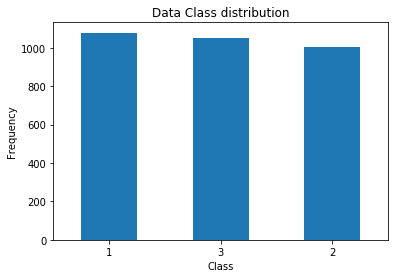

In [5]:
count_classes = pd.value_counts(train_data['type'], sort = True)

# Creating a plot with bar kind:
count_classes.plot(kind = 'bar', rot=0)

# Setting plotting title and axi's legends:
plt.title("Data Class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Training the model:

### Treating the dataset

In [24]:
import numpy as np
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

X = train_data.iloc[:, train_data.columns != 'type']
y = train_data.iloc[:, train_data.columns == 'type']

cols = ['sex']
one_hot_encoder = ce.OneHotEncoder(cols=cols, drop_invariant=True, use_cat_names=True)

# Fiting our encoders to the columns:
one_hot_encoder.fit(X)

# Encoding our dataset:
X_encoded = one_hot_encoder.transform(X)
#test_data = one_hot_encoder.transform(test_data)

Index(['sex_M', 'sex_I', 'sex_F', 'length', 'diameter', 'height',
       'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'],
      dtype='object')


### Evaluating the model

In [36]:


#loo = LeaveOneOut()

score_list = []

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)

    score_list.append(clf.score(X_test, y_test))
print(sum(score_list)/len(score_list))

0.622907551738874


# Fitting the model:

In [37]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_encoded, y)

# Sending to the server:

In [40]:
import requests

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('abalone_app.csv')
data_app_encod = one_hot_encoder.transform(data_app)
y_pred = clf.predict(data_app_encod)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "VovóLearn"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"status":"success","dev_key":"Vov\u00f3Learn","accuracy":0.645933014354067,"old_accuracy":0} 

